In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

import numpy as np
import random

import unidecode

import rdkit
from rdkit import Chem

import pandas as pd

In [2]:
from utils import get_props, strsmis2listsmis, check_validity, computeUMAP

# -------------------------------------------------------------------------
# Percent of intersection and UMAP overlap
# -------------------------------------------------------------------------

**Here, read the generated molecules, for each model and each objective :**

In [59]:
# RL_file = 'gen_smis/RL_1_all_smis_.txt'
# RL_file = 'gen_smis/RL_2_all_smis_.txt'
# RL_file = 'gen_smis/RL_3_all_smis_.txt'
RL_file = 'gen_smis/RL_4_all_smis_.txt'

RL = pd.read_csv(RL_file, header=None)
RL_smis = list(RL[0])

#-------------------------------------------------------------------------------------------------

# CRLV_file = 'gen_smis/CRLV_1_all_smis_.txt'
# CRLV_file = 'gen_smis/CRLV_2_all_smis_.txt'
# CRLV_file = 'gen_smis/CRLV_3_all_smis_.txt'
CRLV_file = 'gen_smis/CRLV_4_all_smis_.txt'

CRLV = pd.read_csv(CRLV_file, header=None)
CRLV_smis = list(CRLV[0])

print(len(RL_smis), len(CRLV_smis))

10000 10000


**Keep only valid_unique ones:**

In [60]:
RL_val = []
CRLV_val = []
for s1, s2 in zip(RL_smis, CRLV_smis):
    v1 = check_validity(s1)
    if v1 == 1:
        RL_val.append(s1)
        
    v2 = check_validity(s2)
    if v2 == 1:
        CRLV_val.append(s2)
        
print(len(RL_val))
print(len(CRLV_val))

print("-----------------------------")
RL_unq = list(set(RL_val))
CRLV_unq = list(set(CRLV_val))
print(len(RL_unq))
print(len(CRLV_unq))

9994
6705
-----------------------------
33
4403


### Percent of intersections:

In [61]:
intersect = list(set(RL_unq) & set(CRLV_unq))

In [62]:
maxL = max(len(RL_unq), len(CRLV_unq))
maxL

4403

In [63]:
print(100 * len(intersect) / maxL, "%")

0.0 %


### Chemical space overlap:

In [64]:
# compute the UMAP
import warnings
warnings.filterwarnings('ignore') 

umap_RL_X = computeUMAP(RL_unq)
umap_CRLV_X = computeUMAP(CRLV_unq)

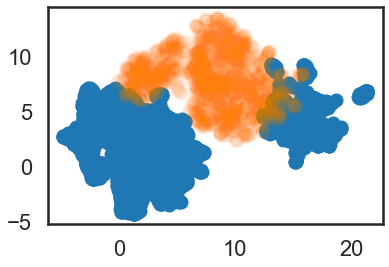

In [39]:
plt.scatter(umap_RL_X.T[0], umap_RL_X.T[1], alpha=1, label='RL-1')       
plt.scatter(umap_CRLV_X.T[0], umap_CRLV_X.T[1], alpha=0.02, label='CRLV-1') 
# plt.legend()

plt.savefig('figs/obj1_umap.png', dpi=300)

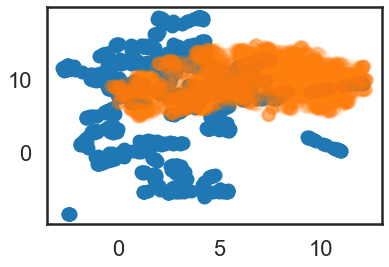

In [47]:
plt.scatter(umap_RL_X.T[0], umap_RL_X.T[1], alpha=1, label='RL-2')       
plt.scatter(umap_CRLV_X.T[0], umap_CRLV_X.T[1], alpha=0.1, label='CRLV-2') 
# plt.legend()

plt.savefig('figs/obj2_umap.png', dpi=300)

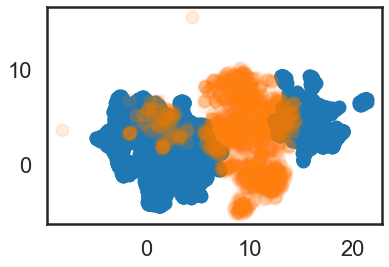

In [58]:
plt.scatter(umap_RL_X.T[0], umap_RL_X.T[1], alpha=1, label='RL-3')       
plt.scatter(umap_CRLV_X.T[0], umap_CRLV_X.T[1], alpha=0.03, label='CRLV-3') 
# plt.legend()

plt.savefig('figs/obj3_umap.png', dpi=300)

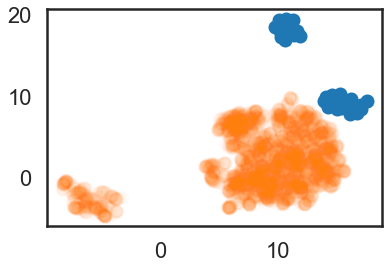

In [67]:
plt.scatter(umap_RL_X.T[0], umap_RL_X.T[1], alpha=1, label='RL-4')       
plt.scatter(umap_CRLV_X.T[0], umap_CRLV_X.T[1], alpha=0.02, label='CRLV-4') 
# plt.legend()

plt.savefig('figs/obj4_umap.png', dpi=300)

# -----------------------------------------------
# Structural variance:
# ------------------------------------------------

In [14]:
def sv(smi):
    return len(set(smi)) / 100 

In [15]:
# Example:
smi = 'Nc1cccc2ncccc12'
print(sv(smi))

smi = '[K+].[O-]S(=O)(=O)c1ccccc1C(=O)n2cc(C(=O)c3ccn4[C@H](SCc34)c5cccnc5)c6ccc(cc26)c7ccc(F)cc7'
print(sv(smi))

0.05
0.24


In [16]:
# read the molecules (from Chembl21) that are satisfying objectives 2, 3 and 4 

fobj2 = pd.read_csv('all_data/obj2.txt', header=None)
obj2 = list(fobj2[0])

fobj3 = pd.read_csv('all_data/obj3.txt', header=None)
obj3 = list(fobj3[0])

fobj4 = pd.read_csv('all_data/obj4.txt', header=None)
obj4 = list(fobj4[0])

In [17]:
# compute their SV:

os2sv = []
os3sv = []
os4sv = []
    
for i, s in enumerate(obj2):
    os2sv.append(sv(s))
    
for i, s in enumerate(obj3):
    os3sv.append(sv(s))
    
for i, s in enumerate(obj4):
    os4sv.append(sv(s))


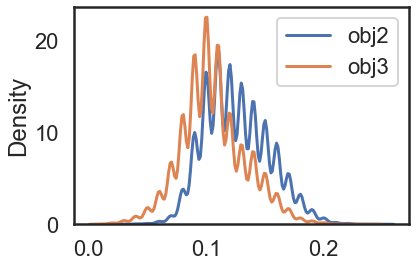

In [18]:
# Plot results
sns.kdeplot(x=os2sv[0:50000], fill=False, label='obj2')#, shade=True)
sns.kdeplot(x=os3sv[0:50000], fill=False, label='obj3')#, shade=True)
plt.legend()

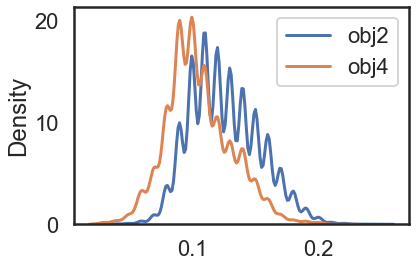

In [19]:
# Plot results
sns.kdeplot(x=os2sv[0:50000], fill=False, label='obj2')#, shade=True)
sns.kdeplot(x=os4sv[0:50000], fill=False, label='obj4')#, shade=True)
plt.legend()

## Example molecules of objective 5:

In [22]:
dataset = unidecode.unidecode(open('all_data/s_100_str_+1M.txt').read())
dataset_smis_ = strsmis2listsmis(dataset)
dataset_smis_[0]

'COc1ccc2[C@@H]3[C@H](COc2c1)C(C)(C)OC4=C3C(=O)C(=O)C5=C4OC(C)(C)[C@@H]6COc7cc(OC)ccc7[C@H]56'

In [4]:
obj5 = []
idxs = []
for i, s in enumerate(dataset_smis_): 
    arr, alr, oh, cooh, coor, nh2, rval = get_props(s, c=2)                                                        
    cycle, grp, rv = 0, 0, 0 
    if arr==2 or alr==1: 
        cycle = 1
    if oh>=1 and cooh>=1 and coor>=1 and nh2>=1:
        grp = 1
    if 0.05<rval<0.5:
        rv = 1

    if cycle==1 and grp==1 and rv==1:
        print("There is one at", i)
        obj5.append(s)   
        idxs.append(i)

There is one at 74359
There is one at 140100
There is one at 151740
There is one at 213038
There is one at 274395
There is one at 361520
There is one at 365067
There is one at 392169
There is one at 432600
There is one at 445777
There is one at 479901
There is one at 515337
There is one at 552106
There is one at 621924
There is one at 635869
There is one at 723269
There is one at 732423
There is one at 738912
There is one at 785390
There is one at 785392
There is one at 785394
There is one at 785395
There is one at 787642
There is one at 796942
There is one at 873360
There is one at 917597
There is one at 921850
There is one at 924728
There is one at 938046
There is one at 939348
There is one at 944402
There is one at 954244
There is one at 962220
There is one at 962725
There is one at 1000203
There is one at 1016015
There is one at 1035824
There is one at 1050392
There is one at 1056647
There is one at 1074411
There is one at 1099731
There is one at 1099977
There is one at 1111176
The

In [4]:
# or read it from the stored file
# fobj5 = pd.read_csv('all_data/obj5.txt', header=None)
# obj5 = list(fobj5[0])
obj5[0]

'Nc1nc(O)c2ncn(COCCOC(=O)CCC(=O)O)c2n1'

In [34]:
len(obj5)

76

In [36]:
obj5[10]       #or using the index: dataset_smis_[idxs[10]]

'N[C@@H](CC(=O)O)C(=O)N[C@@H](CO)C(=O)OC1CCCCC1'

In [37]:
dataset_smis_[idxs[10]]

'N[C@@H](CC(=O)O)C(=O)N[C@@H](CO)C(=O)OC1CCCCC1'

In [38]:
expl = dataset_smis_[479901]
expl

'N[C@@H](CC(=O)O)C(=O)N[C@@H](CO)C(=O)OC1CCCCC1'

In [39]:
# get Chembl ID
from chembl_webresource_client.new_client import new_client
m = new_client.molecule.get(expl)
m["molecule_chembl_id"]

'CHEMBL170782'

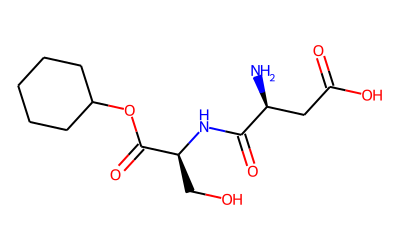

In [40]:
# draw
from rdkit.Chem import Draw
mol = Chem.MolFromSmiles(expl)
Draw.MolToImage(mol, size=(400,250))

# ------------------------------------------------------------------------------------------------

# KDE Plots to visualize the property shift after optimization:                 

# ------------------------------------------------------------------------------------------------

### Objective 1:

In [31]:
df = pd.read_csv('gen_smis/G_all_smis_.txt', header=None)
G_smis = list(df[0])
len(G_smis)

10000

In [32]:
df = pd.read_csv('gen_smis/RL_1_all_smis_.txt', header=None) 
# df = pd.read_csv('gen_smis/CRLV_1_all_smis_.txt', header=None)

biased_smis = list(df[0])
len(biased_smis)

10000

In [33]:
val_smis1 = []
for s1 in G_smis:
    v1 = check_validity(s1)
    if v1 == 1:
        val_smis1.append(s1)
        
val_smis2 = []
for s2 in biased_smis:
    v2 = check_validity(s2)
    if v2 == 1:
        val_smis2.append(s2)
        
        
unq_smis1 = list(set(val_smis1))
unq_smis2 = list(set(val_smis2))

In [34]:
props1 = []
des1 = []
for s in unq_smis1:
    prop1 = get_props(s, c=0)
    props1.append(prop1)
    if prop1 <= 3:
        des1.append(s1)    

props2 = []
des2 = []
for s in unq_smis2:
    prop1 = get_props(s, c=0)
    props2.append(prop1)
    if prop1 <= 3:
        des2.append(s1)

In [35]:
print(len(des1))
print(len(des2))

2485
1923


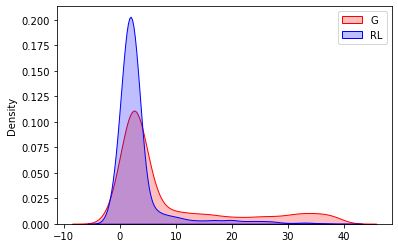

In [36]:
sns.kdeplot(x=props1, shade=True, color="r", label='G')
sns.kdeplot(x=props2, shade=True, color="b", label='RL')
plt.legend()
# plt.savefig('figs/Kde_G_vs_RL_obj1.png', dpi=300)

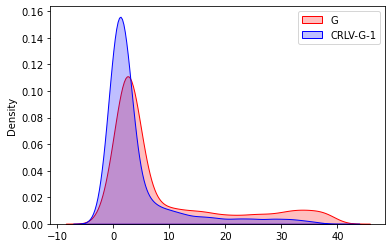

In [27]:
sns.kdeplot(x=props1, shade=True, color="r", label='G')
sns.kdeplot(x=props2, shade=True, color="b", label='CRLV')
plt.legend()
# plt.savefig('figs/Kde_G_vs_CRLV_obj1.png', dpi=300)

# -------------------------------------------------------------------------------------

### Objective 2:

In [28]:
import pandas as pd

df = pd.read_csv('gen_smis/G_all_smis_.txt', header=None)
G_smis = list(df[0])
len(G_smis)

10000

In [29]:
df = pd.read_csv('gen_smis/RL_2_all_smis_.txt', header=None)
# df = pd.read_csv('gen_smis/CRLV_2_all_smis_.txt', header=None)

biased_smis = list(df[0])
len(biased_smis)

10000

In [30]:
from utils import check_validity

val_smis1 = []
for s1 in G_smis:
    v1 = check_validity(s1)
    if v1 == 1:
        val_smis1.append(s1)
        
val_smis2 = []
for s2 in biased_smis:
    v2 = check_validity(s2)
    if v2 == 1:
        val_smis2.append(s2)
        
unq_smis1 = list(set(val_smis1))
unq_smis2 = list(set(val_smis2))

In [354]:
from utils import get_props
    
Gcycles, Ggrps, Grvs = [], [], []
des1 = []
for s in unq_smis1:
    arr, alr, oh, cooh, coor, nh2, rval = get_props(s, c=2)                                                        
    cycle, grp, rv = 0, 0, 0 
    if arr==2 or alr==1: 
        cycle = 1
    Gcycles.append(cycle)
    if oh>=1 or cooh>=1 or coor>=1 or nh2>=1:
        grp = 1
    Ggrps.append(grp)
    if 0.05<rval<0.5:
        rv = 1
    Grvs.append(rv)
    if cycle==1 and grp==1 and rv==1:
        des1.append(s)
        
biased_cycles, biased_grps, biased_rvs = [], [], []
des2 = []
for s in unq_smis2:
    arr, alr, oh, cooh, coor, nh2, rval = get_props(s, c=2)                                                        
    cycle, grp, rv = 0, 0, 0 
    if arr==2 or alr==1: 
        cycle = 1
    biased_cycles.append(cycle)
    if oh>=1 or cooh>=1 or coor>=1 or nh2>=1:
        grp = 1
    biased_grps.append(grp)
    if 0.05<rval<0.5:
        rv = 1
    biased_rvs.append(rv)
    if cycle==1 and grp==1 and rv==1:
        des2.append(s)

In [355]:
print(len(des2))
print(len(des1))

627
1173


### RL:

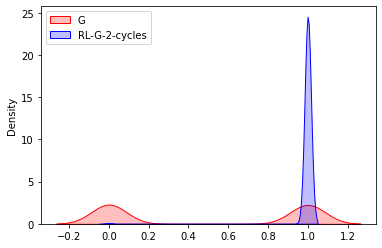

In [356]:
sns.kdeplot(x=Gcycles, shade=True, color="r", label='G')
sns.kdeplot(x=biased_cycles, shade=True, color="b", label='RL-G-2-cycles')
plt.legend(loc=2) 

# plt.savefig('figs/G_vs_RL_obj2_cycles.png', dpi=300)

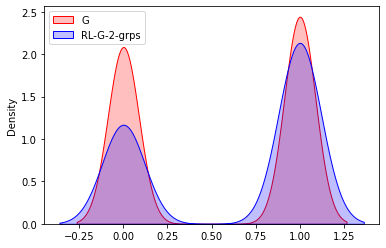

In [357]:
sns.kdeplot(x=Ggrps, shade=True, color="r", label='G')
sns.kdeplot(x=biased_grps, shade=True, color="b", label='RL-G-2-grps')
plt.legend(loc=2)

# plt.savefig('figs/G_vs_RL_obj2_grps.png', dpi=300)

In [358]:
biased_rvs[0] = 0

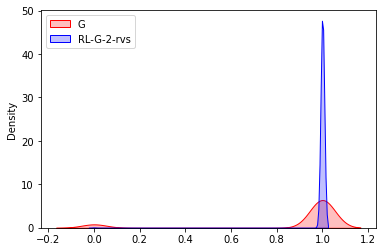

In [359]:
sns.kdeplot(x=Grvs, shade=True, color="r", label='G')
sns.kdeplot(x=biased_rvs, shade=True, color="b", label='RL-G-2-rvs')
plt.legend(loc=2)

# plt.savefig('figs/G_vs_RL_obj2_rvs.png', dpi=300)

###  CRLV:

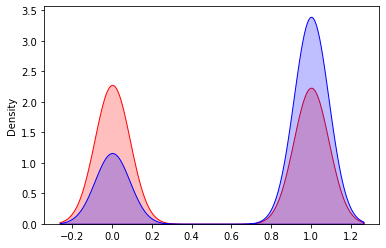

In [123]:
sns.kdeplot(x=Gcycles, shade=True, color="r", label='G')
sns.kdeplot(x=biased_cycles, shade=True, color="b", label='CRLV-G-2-cycles')
# plt.legend()

# plt.savefig('figs/G_vs_CRLV_obj2_cycles.png', dpi=300)

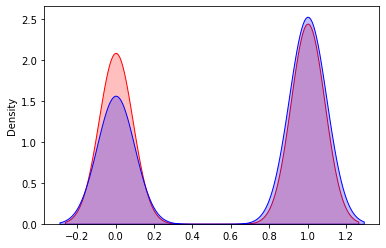

In [122]:
sns.kdeplot(x=Ggrps, shade=True, color="r", label='G')
sns.kdeplot(x=biased_grps, shade=True, color="b", label='CRLV-G-2-grps')
# plt.legend()

plt.savefig('figs/G_vs_CRLV_obj2_grps.png', dpi=300)

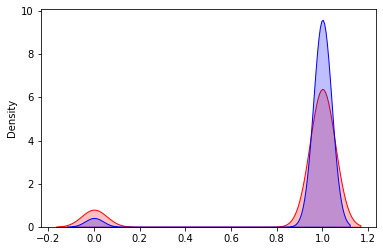

In [124]:
sns.kdeplot(x=Grvs, shade=True, color="r", label='G')
sns.kdeplot(x=biased_rvs, shade=True, color="b", label='CRLV-G-2-rvs')
# plt.legend()

plt.savefig('figs/G_vs_CRLV_obj2_rvs.png', dpi=300)

## -------------------------------------------------------------------------------------------------:
## Objective 3

* logP ≤ 3, 
* molecular weight ≤ 480 g/mol, 
* ≤ 3 hydrogen bond acceptors, 
* ≤ 3 hydrogen bond donors,
* ≤ 3 rotational bonds.

In [360]:
import pandas as pd

df = pd.read_csv('gen_smis/G_all_smis_.txt', header=None)
G_smis = list(df[0])
len(G_smis)

10000

In [361]:
df = pd.read_csv('gen_smis/RL_3_all_smis_.txt', header=None)
# df = pd.read_csv('gen_smis/CRLV_3_all_smis_.txt', header=None)

biased_smis = list(df[0])
len(biased_smis)

10000

In [362]:
from utils import check_validity

val_smis1 = []
for s1 in G_smis:
    v1 = check_validity(s1)
    if v1 == 1:
        val_smis1.append(s1)
        
val_smis2 = []
for s2 in biased_smis:
    v2 = check_validity(s2)
    if v2 == 1:
        val_smis2.append(s2)
        
unq_smis1 = list(set(val_smis1))
unq_smis2 = list(set(val_smis2))

In [363]:
from utils import get_props

Gp1, Gp2, Gp3, Gp4, Gp5 = [], [], [], [], []
for i, s in enumerate(unq_smis1):
    prop1, prop2, prop3, prop4, prop5 = get_props(s, c=1)
    Gp1.append(prop1)
    Gp2.append(prop2)
    Gp3.append(prop3)
    Gp4.append(prop4)
    Gp5.append(prop5)
    
biasedp1, biasedp2, biasedp3, biasedp4, biasedp5 = [], [], [], [], []
for i, s in enumerate(unq_smis2):
    prop1, prop2, prop3, prop4, prop5 = get_props(s, c=1)
    biasedp1.append(prop1)
    biasedp2.append(prop2)
    biasedp3.append(prop3)
    biasedp4.append(prop4)
    biasedp5.append(prop5)

### RL:

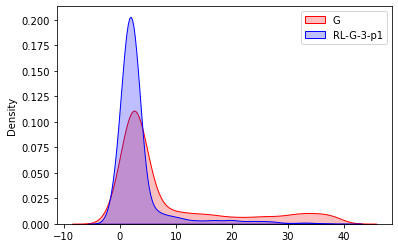

In [364]:
sns.kdeplot(x=Gp1, shade=True, color="r", label='G')
sns.kdeplot(x=biasedp1, shade=True, color="b", label='RL-G-3-p1')
plt.legend()

plt.savefig('figs/G_vs_RL_obj3_p1.png', dpi=300)

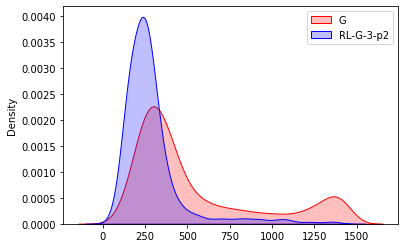

In [365]:
sns.kdeplot(x=Gp2, shade=True, color="r", label='G')
sns.kdeplot(x=biasedp2, shade=True, color="b", label='RL-G-3-p2')
plt.legend()

plt.savefig('figs/G_vs_RL_obj3_p2.png', dpi=300)

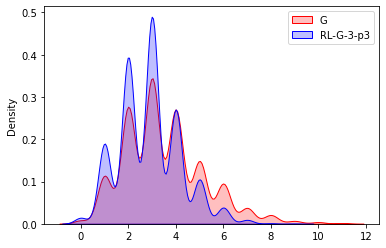

In [366]:
sns.kdeplot(x=Gp3, shade=True, color="r", label='G')
sns.kdeplot(x=biasedp3, shade=True, color="b", label='RL-G-3-p3')
plt.legend()

plt.savefig('figs/G_vs_RL_obj3_p3.png', dpi=300)

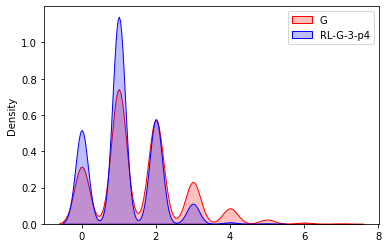

In [367]:
sns.kdeplot(x=Gp4, shade=True, color="r", label='G')
sns.kdeplot(x=biasedp4, shade=True, color="b", label='RL-G-3-p4')
plt.legend()

plt.savefig('figs/G_vs_RL_obj3_p4.png', dpi=300)

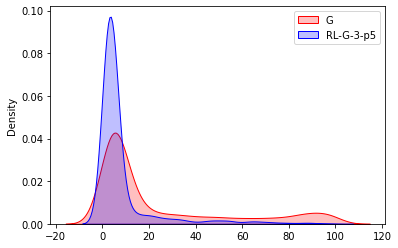

In [368]:
sns.kdeplot(x=Gp5, shade=True, color="r", label='G')
sns.kdeplot(x=biasedp5, shade=True, color="b", label='RL-G-3-p5')
plt.legend()

plt.savefig('figs/G_vs_RL_obj3_p5.png', dpi=300)

### CRLV:

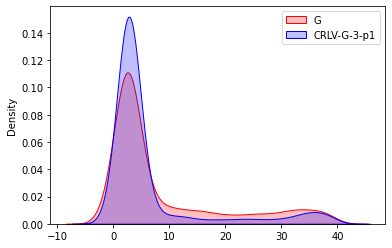

In [346]:
sns.kdeplot(x=Gp1, shade=True, color="r", label='G')
sns.kdeplot(x=biasedp1, shade=True, color="b", label='CRLV-G-3-p1')
plt.legend()

plt.savefig('figs/G_vs_CRLV_obj3_p1.png', dpi=300)

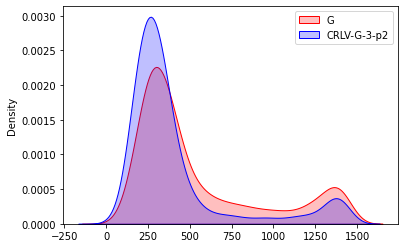

In [347]:
sns.kdeplot(x=Gp2, shade=True, color="r", label='G')
sns.kdeplot(x=biasedp2, shade=True, color="b", label='CRLV-G-3-p2')
plt.legend()

plt.savefig('figs/G_vs_CRLV_obj3_p2.png', dpi=300)

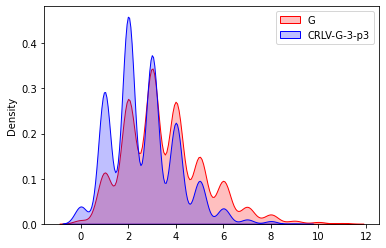

In [348]:
sns.kdeplot(x=Gp3, shade=True, color="r", label='G')
sns.kdeplot(x=biasedp3, shade=True, color="b", label='CRLV-G-3-p3')
plt.legend()

plt.savefig('figs/G_vs_CRLV_obj3_p3.png', dpi=300)

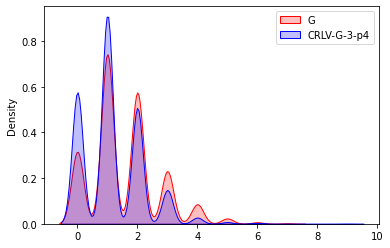

In [349]:
sns.kdeplot(x=Gp4, shade=True, color="r", label='G')
sns.kdeplot(x=biasedp4, shade=True, color="b", label='CRLV-G-3-p4')
plt.legend()

plt.savefig('figs/G_vs_CRLV_obj3_p4.png', dpi=300)

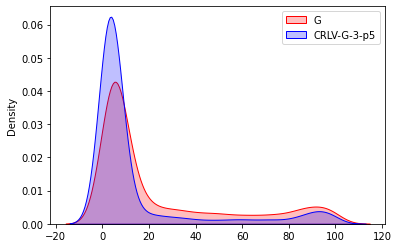

In [350]:
sns.kdeplot(x=Gp5, shade=True, color="r", label='G')
sns.kdeplot(x=biasedp5, shade=True, color="b", label='CRLV-G-3-p5')
plt.legend()

plt.savefig('figs/G_vs_CRLV_obj3_p5.png', dpi=300)

## --------------------------------------------------------------------------
## Objective 4

In [319]:
import pandas as pd

df = pd.read_csv('gen_smis/G_all_smis_.txt', header=None)
G_smis = list(df[0])
len(G_smis)

10000

In [320]:
df = pd.read_csv('gen_smis/RL_4_all_smis_.txt', header=None) 
# df = pd.read_csv('gen_smis/CRLV_4_all_smis_.txt', header=None)

biased_smis = list(df[0])
len(biased_smis)

10000

In [321]:
from utils import check_validity

val_smis1 = []
for s1 in G_smis:
    v1 = check_validity(s1)
    if v1 == 1:
        val_smis1.append(s1)
        
val_smis2 = []
for s2 in biased_smis:
    v2 = check_validity(s2)
    if v2 == 1:
        val_smis2.append(s2)
        
unq_smis1 = list(set(val_smis1))
unq_smis2 = list(set(val_smis2))

In [322]:
from utils import get_props
    
Gcycles, Ggrps, Grvs = [], [], []
Gp1, Gp2, Gp3, Gp4, Gp5 = [], [], [], [], []
des1 = []
for s in unq_smis1:
    arr, alr, oh, cooh, coor, nh2, rval = get_props(s, c=2)                                                        
    cycle, grp, rv = 0, 0, 0 
    if arr==2 or alr==1: 
        cycle = 1
    Gcycles.append(cycle)
    if oh>=1 or cooh>=1 or coor>=1 or nh2>=1:
        grp = 1
    Ggrps.append(grp)
    if 0.05<rval<0.5:
        rv = 1
    Grvs.append(rv)
    
    prop1, prop2, prop3, prop4, prop5 = get_props(s, c=1)
    Gp1.append(prop1)
    Gp2.append(prop2)
    Gp3.append(prop3)
    Gp4.append(prop4)
    Gp5.append(prop5)
    
    if cycle==1 and grp==1 and rv==1 and prop1<=3 and prop2<=480 and prop3<=3 and prop4<=3 and prop5<=3:
        des1.append(s)
        
biased_cycles, biased_grps, biased_rvs = [], [], []
biasedp1, biasedp2, biasedp3, biasedp4, biasedp5 = [], [], [], [], []
des2 = []
for s in unq_smis2:
    arr, alr, oh, cooh, coor, nh2, rval = get_props(s, c=2)                                                        
    cycle, grp, rv = 0, 0, 0 
    if arr==2 or alr==1: 
        cycle = 1
    biased_cycles.append(cycle)
    if oh>=1 or cooh>=1 or coor>=1 or nh2>=1:
        grp = 1
    biased_grps.append(grp)
    if 0.05<rval<0.5:
        rv = 1
    biased_rvs.append(rv)
    
    prop1, prop2, prop3, prop4, prop5 = get_props(s, c=1)
    biasedp1.append(prop1)
    biasedp2.append(prop2)
    biasedp3.append(prop3)
    biasedp4.append(prop4)
    biasedp5.append(prop5)
    
    if cycle==1 and grp==1 and rv==1 and prop1<=3 and prop2<=480 and prop3<=3 and prop4<=3 and prop5<=3:
        des2.append(s)

In [323]:
print(len(des1))
print(len(des2))

89
15


### RL:

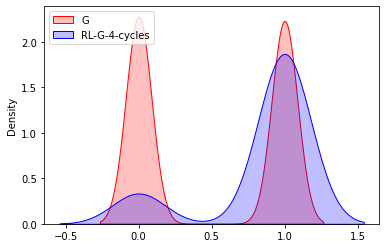

In [324]:
sns.kdeplot(x=Gcycles, shade=True, color="r", label='G')
sns.kdeplot(x=biased_cycles, shade=True, color="b", label='RL-G-4-cycles')
plt.legend(loc=2) #or outside: bbox_to_anchor=(0.6, 1.2))

# plt.savefig('figs/G_vs_RL_obj4_cycles.png', dpi=300)

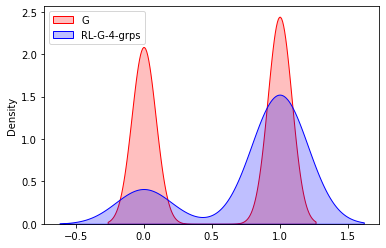

In [325]:
sns.kdeplot(x=Ggrps, shade=True, color="r", label='G')
sns.kdeplot(x=biased_grps, shade=True, color="b", label='RL-G-4-grps')
plt.legend(loc=2) #or outside: bbox_to_anchor=(0.6, 1.2))

# plt.savefig('figs/G_vs_RL_obj4_grps.png', dpi=300)

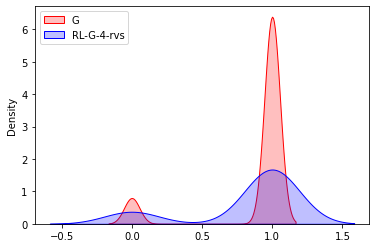

In [326]:
sns.kdeplot(x=Grvs, shade=True, color="r", label='G')
sns.kdeplot(x=biased_rvs, shade=True, color="b", label='RL-G-4-rvs')
plt.legend(loc=2) #or outside: bbox_to_anchor=(0.6, 1.2))

# plt.savefig('figs/G_vs_RL_obj4_rvs.png', dpi=300)

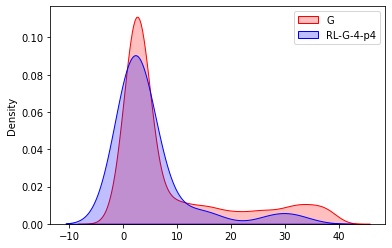

In [327]:
sns.kdeplot(x=Gp1, shade=True, color="r", label='G')
sns.kdeplot(x=biasedp1, shade=True, color="b", label='RL-G-4-p4')
plt.legend()

# plt.savefig('figs/G_vs_RL_obj4_p1.png', dpi=300)

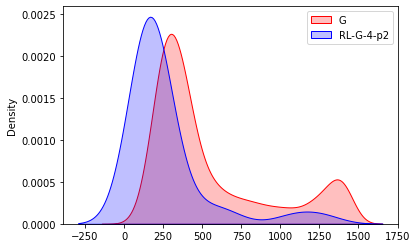

In [328]:
sns.kdeplot(x=Gp2, shade=True, color="r", label='G')
sns.kdeplot(x=biasedp2, shade=True, color="b", label='RL-G-4-p2')
plt.legend()

# plt.savefig('figs/G_vs_RL_obj4_p2.png', dpi=300)

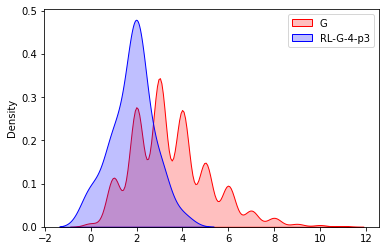

In [329]:
sns.kdeplot(x=Gp3, shade=True, color="r", label='G')
sns.kdeplot(x=biasedp3, shade=True, color="b", label='RL-G-4-p3')
plt.legend()

# plt.savefig('figs/G_vs_RL_obj4_p3.png', dpi=300)

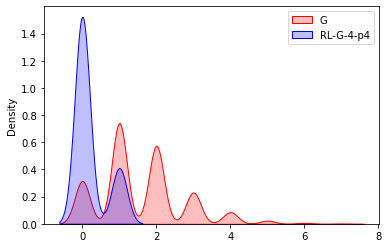

In [330]:
sns.kdeplot(x=Gp4, shade=True, color="r", label='G')
sns.kdeplot(x=biasedp4, shade=True, color="b", label='RL-G-4-p4')
plt.legend()

# plt.savefig('figs/G_vs_RL_obj4_p4.png', dpi=300)

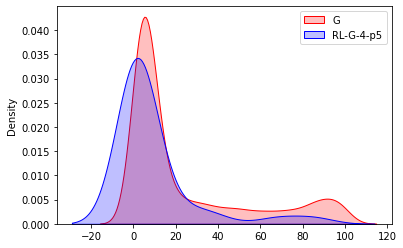

In [331]:
sns.kdeplot(x=Gp5, shade=True, color="r", label='G')
sns.kdeplot(x=biasedp5, shade=True, color="b", label='RL-G-4-p5')
plt.legend()

# plt.savefig('figs/G_vs_RL_obj4_p5.png', dpi=300)

### CRLV:

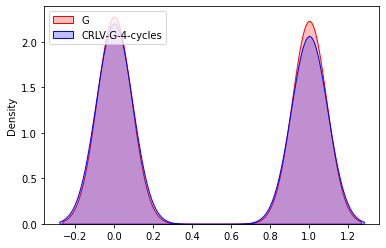

In [298]:
sns.kdeplot(x=Gcycles, shade=True, color="r", label='G')
sns.kdeplot(x=biased_cycles, shade=True, color="b", label='CRLV-G-4-cycles')
plt.legend(loc=2) #or outside: bbox_to_anchor=(0.6, 1.2))

# plt.savefig('figs/G_vs_CRLV_obj4_cycles.png', dpi=300)

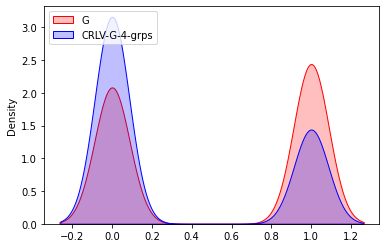

In [299]:
sns.kdeplot(x=Ggrps, shade=True, color="r", label='G')
sns.kdeplot(x=biased_grps, shade=True, color="b", label='CRLV-G-4-grps')
plt.legend(loc=2) #or outside: bbox_to_anchor=(0.6, 1.2))

# plt.savefig('figs/G_vs_RL_obj4_grps.png', dpi=300)

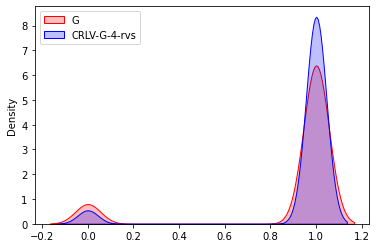

In [300]:
sns.kdeplot(x=Grvs, shade=True, color="r", label='G')
sns.kdeplot(x=biased_rvs, shade=True, color="b", label='CRLV-G-4-rvs')
plt.legend(loc=2) #or outside: bbox_to_anchor=(0.6, 1.2))

# plt.savefig('figs/G_vs_RL_obj4_rvs.png', dpi=300)

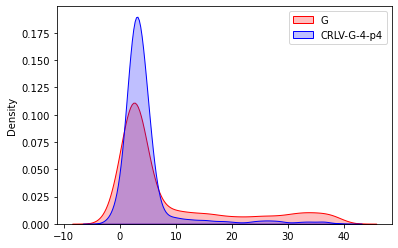

In [301]:
sns.kdeplot(x=Gp1, shade=True, color="r", label='G')
sns.kdeplot(x=biasedp1, shade=True, color="b", label='CRLV-G-4-p4')
plt.legend()

# plt.savefig('figs/G_vs_RL_obj4_p1.png', dpi=300)

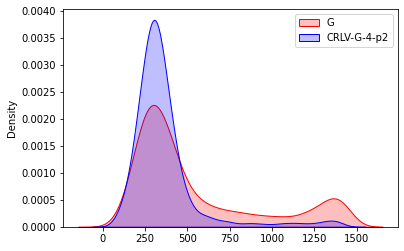

In [302]:
sns.kdeplot(x=Gp2, shade=True, color="r", label='G')
sns.kdeplot(x=biasedp2, shade=True, color="b", label='CRLV-G-4-p2')
plt.legend()

# plt.savefig('figs/G_vs_RL_obj4_p2.png', dpi=300)

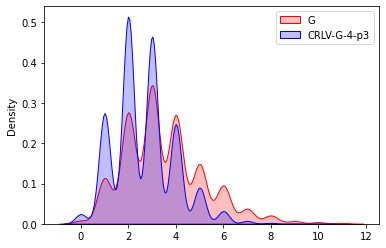

In [303]:
sns.kdeplot(x=Gp3, shade=True, color="r", label='G')
sns.kdeplot(x=biasedp3, shade=True, color="b", label='CRLV-G-4-p3')
plt.legend()

# plt.savefig('figs/G_vs_RL_obj4_p3.png', dpi=300)

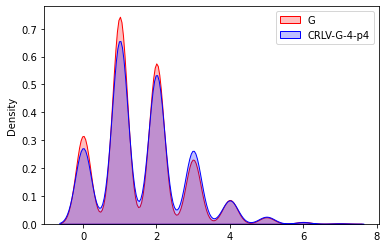

In [304]:
sns.kdeplot(x=Gp4, shade=True, color="r", label='G')
sns.kdeplot(x=biasedp4, shade=True, color="b", label='CRLV-G-4-p4')
plt.legend()

# plt.savefig('figs/G_vs_RL_obj4_p4.png', dpi=300)

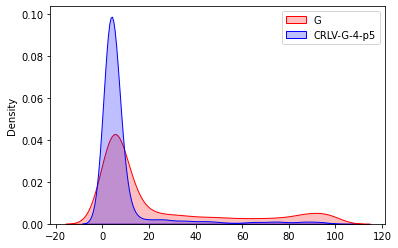

In [305]:
sns.kdeplot(x=Gp5, shade=True, color="r", label='G')
sns.kdeplot(x=biasedp5, shade=True, color="b", label='CRLV-G-4-p5')
plt.legend()

# plt.savefig('figs/G_vs_RL_obj4_p5.png', dpi=300)